## 시계열 자료
- 연속 시계열 데이터, 이산 시계열 데이터
- 추세 변동, 순환 변동, 계절 변동, 불규칙 변동
- time lag(시차) 중요
- 가까운 관측시점일수록 관측자료들 간에 상관관계가 커짐
- 과거의 시계열적인 패턴에서 새로운 인사이트를 찾아내려 함
- 평균, 분산이 일정한 데이터가 시계열 분석에서 유용
    - 계절적, 추세적 요인을 제거해줘야 함
    - 순환적인 요인은 제거할 필요 없다.
    - 불규칙 요인또한 제거 해야 함
- 평활화 기법(smoothing methods)

- 내포된 변동요인이 고정적 패턴을 보이는 경우: 요소분해법
- 다양한 변동요인이 고정적 패턴을 보이지 않는 경우: (지수)평활법
- 분석모형에 따라 추정된 추정값과 관측값과의 차이인 **잔차의 시계열** 자료(Residual Error Series)는 확률과정으로 나타낼 수 있다.
- 이때 고려되는 것이 확률모형(Stochastic Model)이다.
  - **시계열 분석에서 모형이 잘 적합될 때 잔차의 시계열 자료는 백색잡음(white noise)이 된다**
  - x_t = y_t - ^y_t =~ N(0, σ^2)
  - 즉, 잔차는 **서로 독립**이다

---

## 평활화 기법 (Smoothing Methods)
- 불규칙성을 없애는 방법

* 이동평균법
* 지수평활법

이동평균법(moving average method)
- n (n 기간 동안) 의 평균을 구해서 연결하는 방법
- 전체 관측치의 개수가 줄어든다
- 평균값으로 연결하므로, 데이터가 파악할 수 있을 정도로 나타날것이라고 생각한다

* SMA(simple moving average)
    - 단순 이동 평균은 가장 일반적인 평균 유형
    - pandas의 Series.rolling(window=20) 메서드 이용
    - window = 구간 개수
    - 슬라이딩 넓이의 값이 클수록 데이터가 평활해지만, 값이 크면 정확도가 떨어질 수 있다

* EMA(Exponential Moving Average)
    - 가까운 데이터에 가중치를 더 많이 준다
    - 멀어진 데이터에 가중치를 덜 준다
    - pandas의 Series.ewn() 메서드를 이용

Text(0.5, 1.0, 'Close Price for Apple')

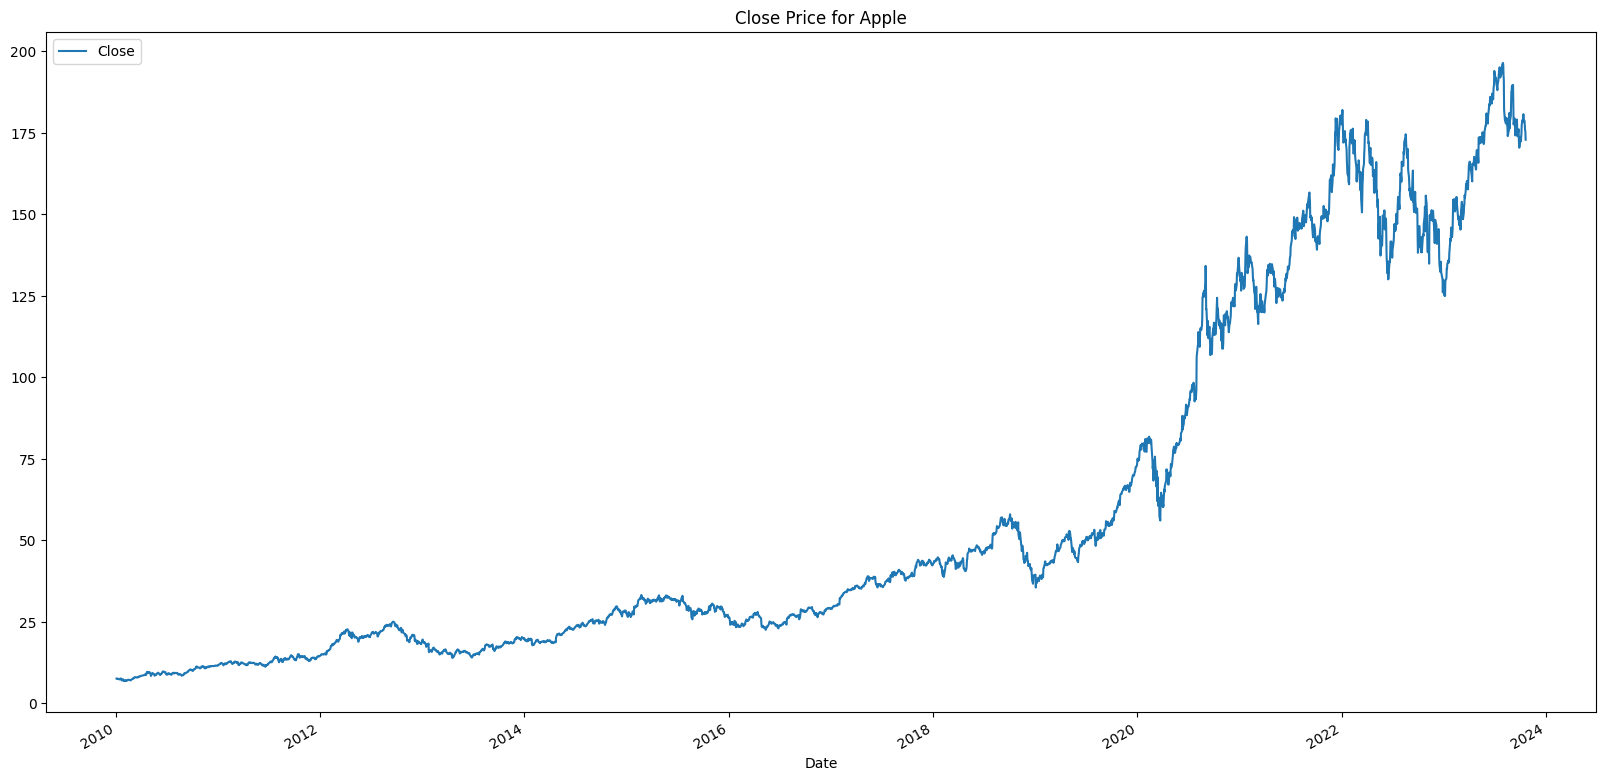

In [402]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df_apple = fdr.DataReader("AAPL", start="2010")

df_apple[["Close"]].plot(figsize=(20, 10))
df_apple["Close_7Days_Mean"] = df_apple["Close"].rolling(7).mean()
plt.title("Close Price for Apple")

In [403]:
df_apple.tail(5)

,Open,High,Low,Close,Adj Close,Volume,Close_7Days_Mean
Date,,,,,,,
2023-10-16,176.750000,179.080002,176.509995,178.720001,178.720001,52517000,178.992861
2023-10-17,176.649994,178.419998,174.800003,177.149994,177.149994,57549400,178.944288
2023-10-18,175.580002,177.580002,175.110001,175.839996,175.839996,54764400,178.494287
2023-10-19,176.039993,177.839996,175.190002,175.460007,175.460007,59302900,178.075716
2023-10-20,175.309998,175.419998,172.639999,172.880005,172.880005,64189300,177.087145


<Axes: xlabel='Date'>

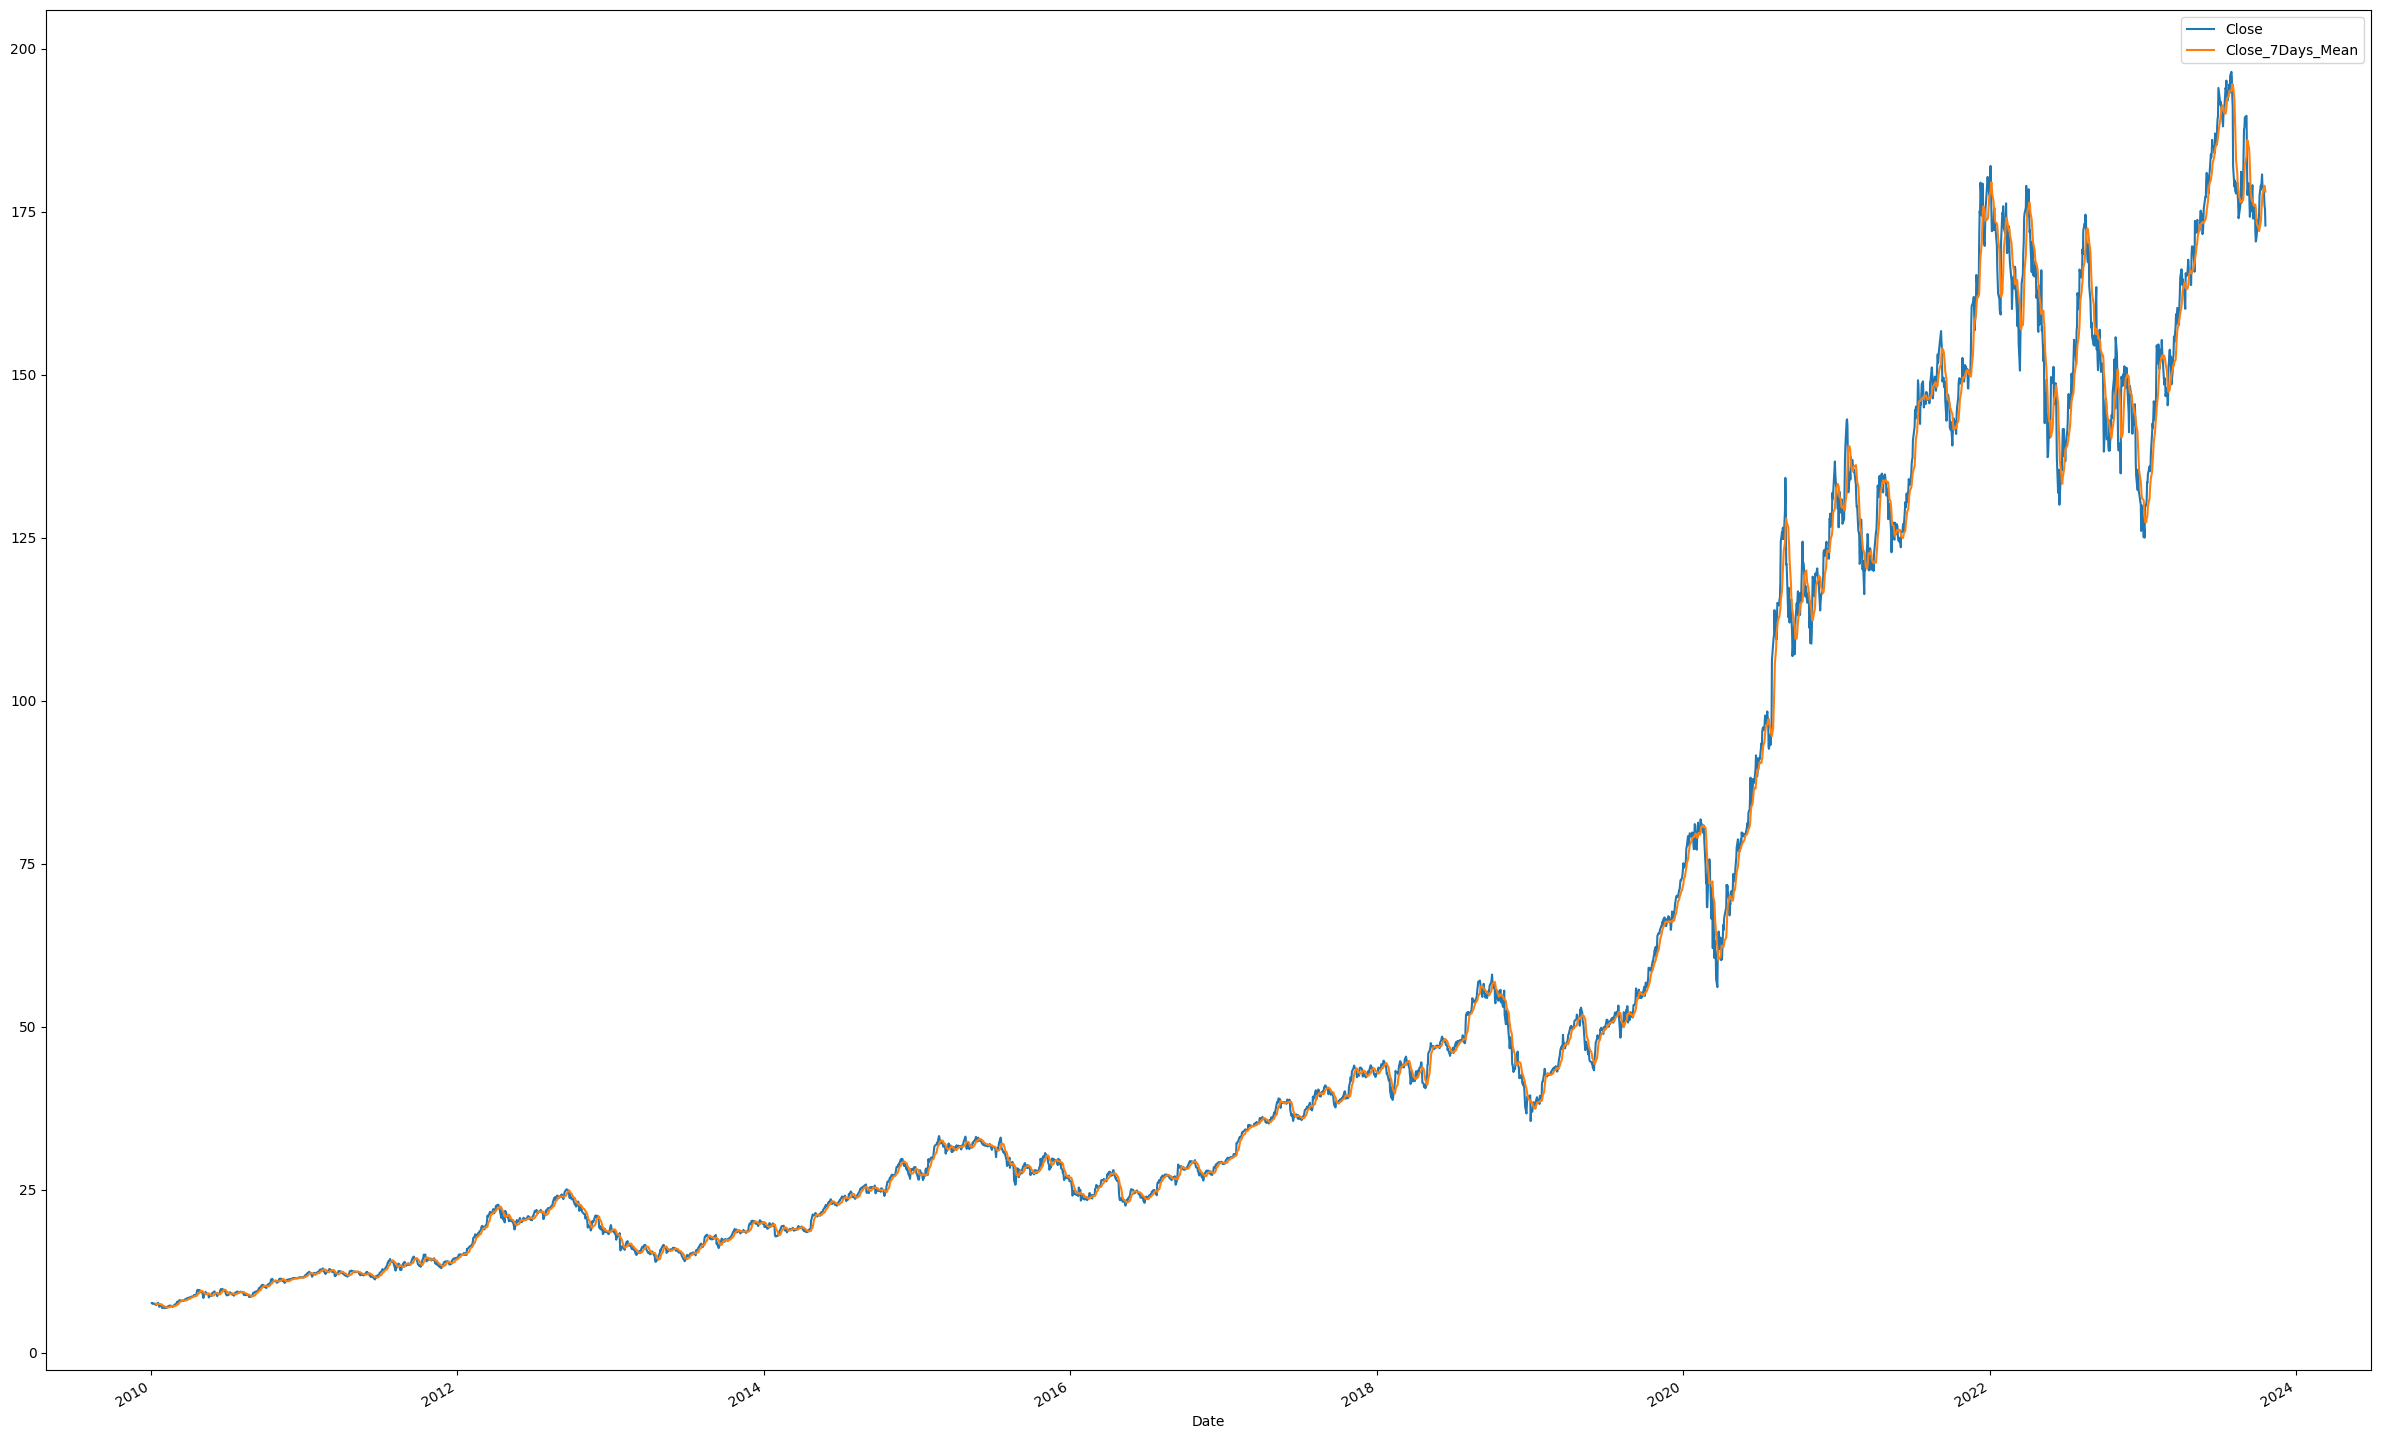

In [404]:
from datetime import datetime
last_day = datetime(2023, 10, 23)
# df_apple.loc[last_day, "Close"] = np.nan
df_apple["Close_7Days_Mean"] = df_apple["Close"].rolling(7).mean().shift(1)
df_apple[["Close", "Close_7Days_Mean"]].plot(figsize=(30, 20))

<Axes: xlabel='Date'>

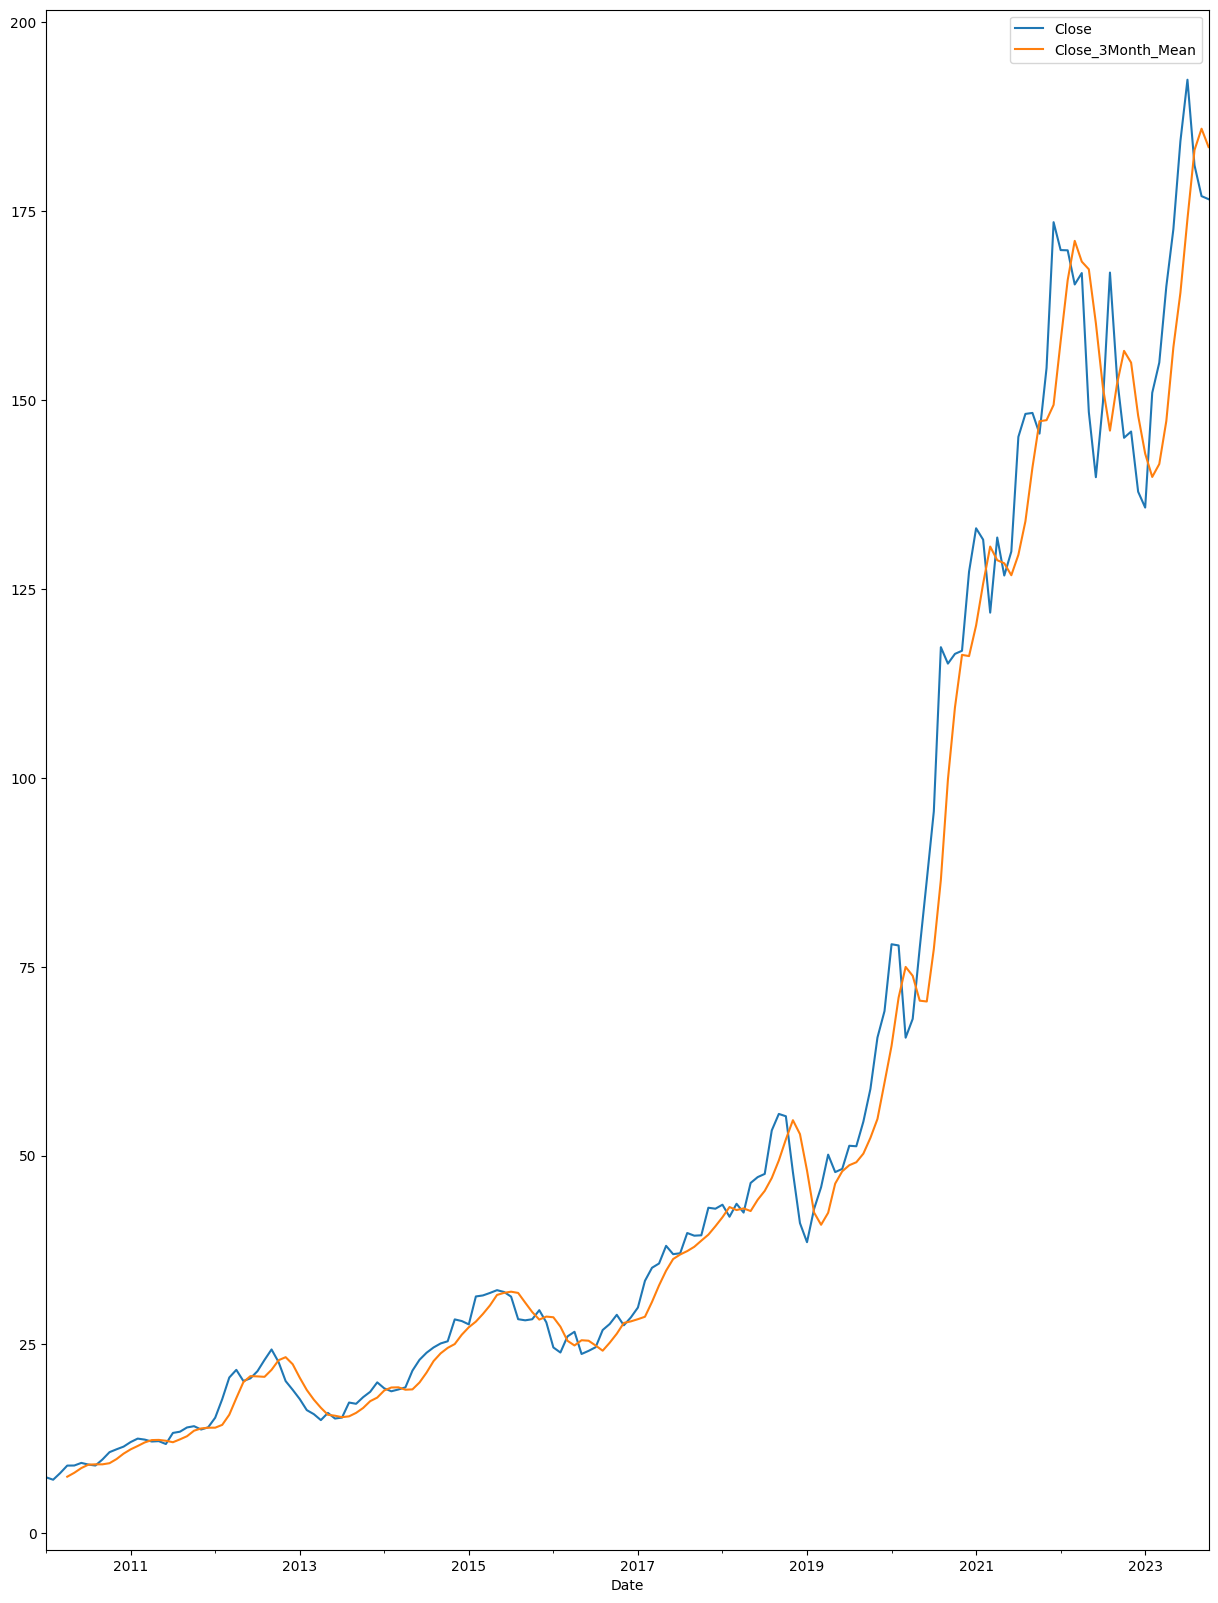

In [405]:
# 월단위로 주식 가격의 평균을 샘플링
df_apple_monthly = df_apple.resample(rule="M").mean()
# 마지막 컬럼 (Close_7Days_Mean) 제외
df_apple_monthly = df_apple_monthly.iloc[:, :-1]

df_apple_monthly[["Close_3Month_Mean"]] = df_apple_monthly[["Close"]].rolling(3).mean().shift(1)
df_apple_monthly[["Close", "Close_3Month_Mean"]].plot(figsize=(15, 20))

---

## 정상성(Stationarity)
- 정태성(일정하여 늘 한결같은 성질)이라고 함
- 평균과, 분산이 일정하다
- 시계열에서 정상성이 있다는 것은 추세나 동향이 없는 상태
- stationarity가 있는 데이터를 가지고 시계열 분석을 해야 한다.
- 시계열 모형으로 적합시키기 위한 전제 조건
- 비정상성 시계열은 정상시계열로 변환해야 하며, 차분(differencing)을 이용한다

## 차분(differencing)

- 계절성,추세성을 없애주는 방법
- 현시점 자료에서 전 시점 자료를 빼는 것을 말한다
- stationarity가 있는 데이터로 바꾸는 방법
- 너무 많이 차분을 하면, 데이터의 속성을 잃을 수 있다

* 일반차분(regular difference): 바로 전 시점의 자료를 빼는 것
* 계절차분(seasonal difference) : 여러 시점 전의 자료를 빼는 것

In [422]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
## getting drug sales dataset

df=pd.read_csv('../datasets/a10.csv',parse_dates=['date'],index_col='date')
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


### 시계열 정상성 확인 - ADF 테스트
- ADF Test(Augmented Dickey-Fuller Test)는 시계열 데이터의 정상성 여부를 통계적인 정량 방법으로 검증하는 방법이다.

- 귀무가설 Null hypothesis: 증명하고자 하는 가설의 반대되는 가설, 효과와 차이가 없는 가설. 기각에 실패하면 시계열이 비정상성(Non-stationary)임을 의미한다.
- 대립가설 Alternative hypothesis : 증명하고자 하는 가설. 귀무가설이 기각되고 시계열이 정상성(Stationary)임을 의미한다.

In [423]:
from statsmodels.tsa.stattools import adfuller

def adf_test(data):
    result = adfuller(data.values)
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])
    print('num of lags: %f' % result[2])
    print('num of observations: %f' % result[3])
    print('Critical values:')
    for k, v in result[4].items():
        print('\t%s: %.3f' % (k,v))

print('ADF TEST 결과')
adf_test(df.value)

ADF TEST 결과
ADF Statistics: 3.145186
p-value: 1.000000
num of lags: 15.000000
num of observations: 188.000000
Critical values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


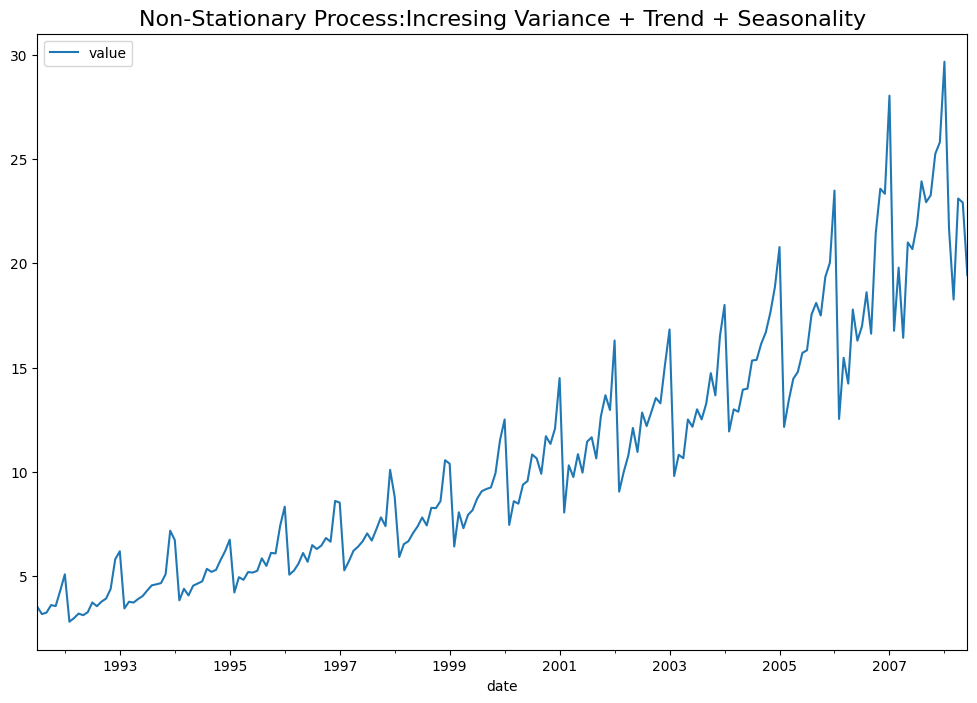

In [407]:
df.plot(figsize=[12,8])
plt.title('Non-Stationary Process:Incresing Variance + Trend + Seasonality',fontsize=16)
plt.show()

In [408]:
df_vst = pd.DataFrame(np.log(df.value))
df_vst.head()

,value
date,
1991-07-01,1.260332
1991-08-01,1.157161
1991-09-01,1.179338
1991-10-01,1.283986
1991-11-01,1.271408


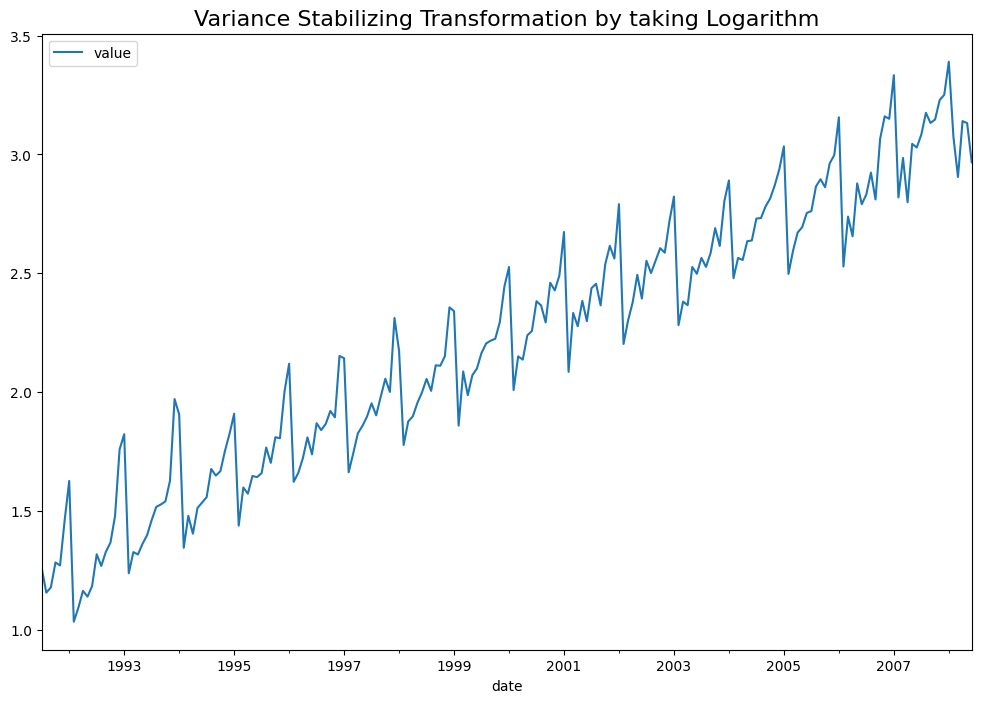

In [409]:
## plotting
## 로그로 변환!!!!

df_vst.plot(figsize=(12,8))
plt.title("Variance Stabilizing Transformation by taking Logarithm", fontsize=16)
plt.show()

<Figure size 1200x800 with 0 Axes>

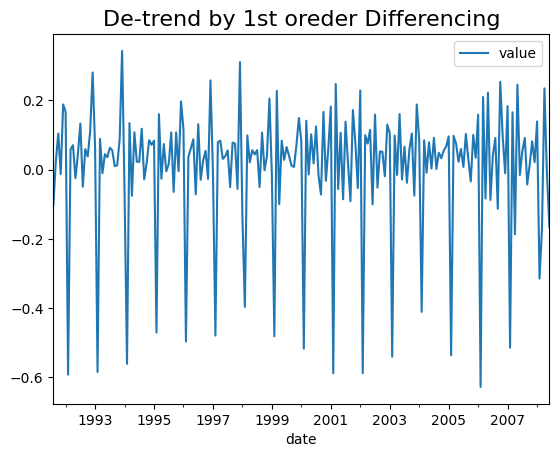

In [410]:
## De-trend by Differencing
## 하루 전 날 데이터 빼기

df_vst_diff1 = df_vst.diff(1).dropna()
df_vst_diff1
plt.figure(figsize=(12,8))
df_vst_diff1.plot()
plt.title("De-trend by 1st oreder Differencing",fontsize=16)
plt.show()

<Figure size 1200x800 with 0 Axes>

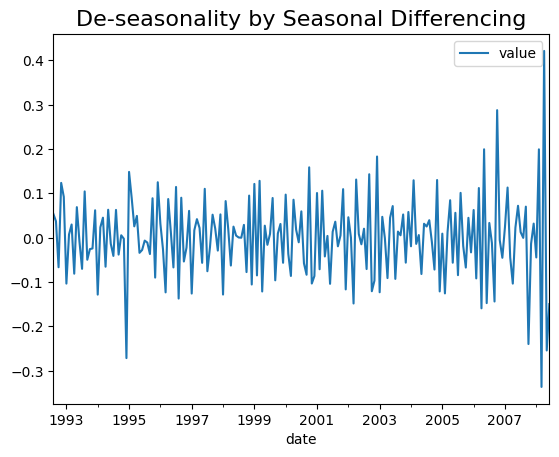

In [411]:
## Stationary Process:De -seasonaliry by Seasonal Differencing
## 12전으로 함수 처분
df_vst_diff1_diff12 = df_vst_diff1.diff(12).dropna()
## plotting
plt.figure(figsize=(12,8))
df_vst_diff1_diff12.plot()
plt.title("De-seasonality by Seasonal Differencing", fontsize=16)
plt.show()

시계열 데이터를 가지고 분석할 때 **정상성** 을 만족해야한다
- 정상성이 만족하지 않는다면..? -> **추세 변동, 순환 변동, 계절 변동, 불규칙 변동**
    - 추세, 계절 변동 없애는 방법 -> 차분, log변환, box-cox등등
    - 순환 변동은 없애지 않는다
        - 순환 변동과 추세,계절은 어떻게 구분하냐? --> 분석가의 역량이다
    - 불규칙 변동 없애는 방법 --> 평활화 기법(이동, 지수 평활화 기법이 있다)

---

## 모델을 이용한 시계열 분석 방법

1. AR(p)모형 : 자기회귀 모형
2. MA(q)모형 : 이동평균 모형
3. ARMA(p,q) 
4. ARIMA(p,d,q) : 자기회귀누적이동평균 모형 , 차수의 개수(d)는 2를 거의 넘지 않는다
5. SARIMA(seasonal ARIMA) : 계절 가지회귀이동평균 모형

### AR 모형
- 자귀 회귀 모형으로, Auto Correlation의 약자이다.
- 자기상관성을 시계열 모형으로 구성하였으며, 예측하고자 하는 특정 변수의 과거 관측값의 선형결합으로 해당 변수의 미래값을 예측하는 모형이다.
- 이전 자신의 관측값이 이후 자신의 관측값에 영향을 준다는 아이디어에 기반하였다.
- yt=c+ϕ1yt−1+ϕ2yt−2+...+ϕpyt−p+εt
    - yt는 t시점의 관측값, c는 상수, ϕ는 가중치, εt는 오차항을 의미한다.

### MA 모형
- Moving Average 모형으로, 예측 오차를 이용하여 미래를 예측하는 모형이다.
- yt=c+θ1εt−1+θ2εt−2+...+θqεt−q+εt

### ARIMA 모형
- ARIMA(p,d,q) 모형은 d차 차분한 데이터에 위 AR(p) 모형과 MA(q) 모형을 합친 모형
- y′t=c+ϕ1y′t−1+ϕ2y′t−2+...+ϕpy′t−p+θ1εt−1+θ2εt−2+...+θqεt−q+εt
- 단, y′은 d차 차분을 구한 시계열, p는 자기회귀 부분의 차수, d는 차분 회수, q는 이동평균 부분의 차수이다.
- ARIMA(AR, I, MA)
- ARIMA(1,2,1) --> AR모델 1번하고, 2번 차분하고, MR모델을 1번 하겠다

### ACF(자기상관함수, AutoCorrelation Function)
- 시차에 따른 일련의 자기상관을 의미하며, 시차가 커질수록 ACF는 0에 가까워진다.
- 정상 시계열은 상대적으로 빠르게 0에 수렴하며, 비정상 시계열은 천천히 감소하고, 종종 큰 양의 값을 가진다.
- ACF가 주 느리게 감소한다 -> 정상성을 띄지 않는다
- ACF가 급격히 cut-off되면 -> 정상성을 띈다

### PACF(편자기상관함수, Partial AutoCorrelation Function)
- timelag와 timelag 사이안의 상관관계를 구해보기
- 시차가 다른 두 시계열 데이터 간의 순수한 상호 연관성이다.
- PACF(k)=Corr(et,et−k)
- et=yt−(β1yt−1+...+βk−1yt−(k−1))

- AR(p) : ACF 가 완만하게 감소, PACF가 갑자기 cut-off
- MR(q) : ACF가 cut-off , PACF가 완만하게 감소
- ARMA(p,q) : ACF, PACF가 완만하게 감소
- p,q값에 주관이 들어갈 수 있다

---

## ARIMA 모델을 가지고 비트코인 가격을 예측하기

In [412]:
df=pd.read_csv('../datasets/2020_bitcoin_price.csv')
df.columns = ['data','price']
df=df.sort_values(by='data').reset_index(drop=True)
df

,data,price
0,2020-01-01T00:00:00,8342000.0
1,2020-01-01T04:00:00,8318000.0
2,2020-01-01T08:00:00,8312000.0
3,2020-01-01T12:00:00,8332000.0
4,2020-01-01T16:00:00,8337000.0
...,...,...
2064,2020-12-30T04:00:00,31586000.0
2065,2020-12-30T08:00:00,30966000.0
2066,2020-12-30T12:00:00,31152000.0
2067,2020-12-30T16:00:00,31699000.0


In [413]:
train=df[:2020]
test=df[2020:]

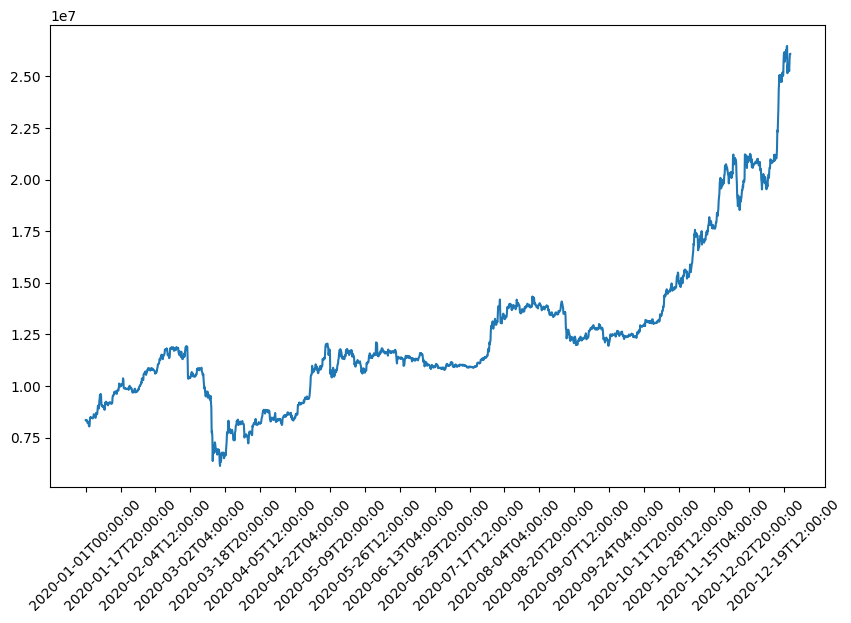

In [414]:
plt.figure(figsize=(10,6))
plt.plot(train['data'],train['price'])
plt.xticks(range(0, len(train['price'])+len(test['price']), 100), rotation=45)
plt.show()

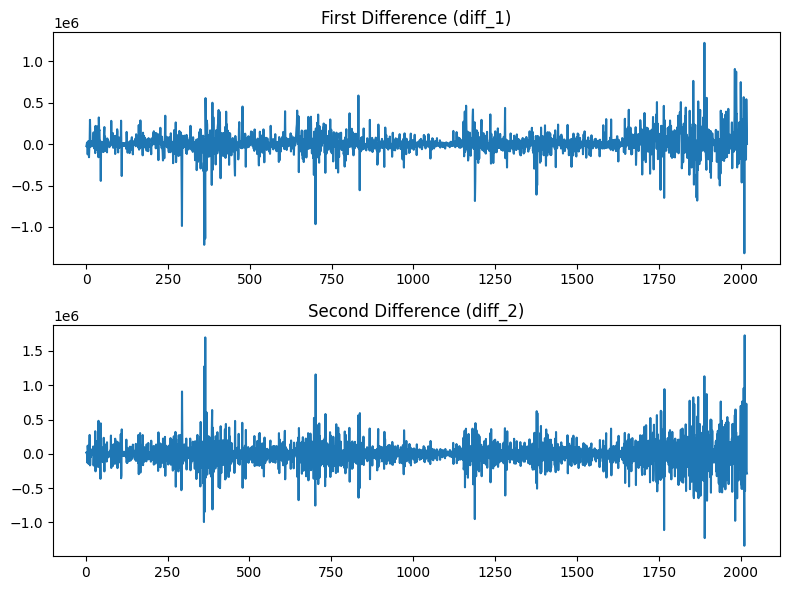

In [415]:
diff_1 = train['price'].diff().dropna()  ## 1차 차분
diff_2 = diff_1.diff().dropna()          ## 2차 차분


fig, axs = plt.subplots(2, 1, figsize=(8, 6))

axs[0].plot(diff_1)
axs[0].set_title('First Difference (diff_1)')

axs[1].plot(diff_2)
axs[1].set_title('Second Difference (diff_2)')

plt.tight_layout()
plt.show()

- 그래프를 보고 2차 차분이 조금 더 정상성을 만족한다고 판단(개인적인 주관)

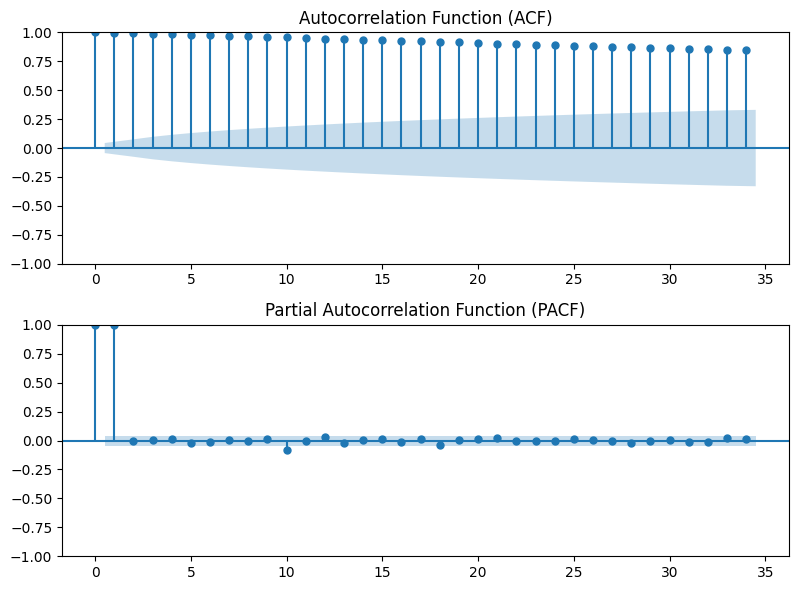

In [416]:
# ACF , PACF 그래프 확인
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axs = plt.subplots(2, 1, figsize=(8, 6))

plot_acf(train['price'], ax=axs[0])
axs[0].set_title('Autocorrelation Function (ACF)')

plot_pacf(train['price'], ax=axs[1])
axs[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


- ACF는 점진적으로 감소 -> q=0
- PACF는 자기자신을 제외한 첫번째 lag에서 급격하게 감소 -> p=1
- AR -> 1, MA -> 0

## statsmodels.tsa.arima.model.ARIMA
- class statsmodels.tsa.arima.model.ARIMA(endog, exog=None, order=(0, 0, 0), seasonal_order=(0, 0, 0, 0), trend=None, enforce_stationarity=True, enforce_invertibility=True, concentrate_scale=False, trend_offset=1, dates=None, freq=None, missing='none', validate_specification=True)

- endog (반드시 필요한 매개변수):관측된 시계열 데이터 프로세스입니다.
- exog (선택적 매개변수):밖적 회귀 변수의 배열입니다.
- order (선택적 매개변수):자기회귀, 차분 및 이동평균 구성요소의 모델(p, d, q) 순서입니다. d는 항상 정수이며, p와 q는 정수 또는 정수 목록이 될 수 있습니다.
- seasonal_order (선택적 매개변수):
AR 매개변수, 차이, MA 매개변수 및 주기성 모델의 계절 구성요소(P, D, Q, s) 순서입니다. 기본값은 (0, 0, 0, 0)입니다. D 및 s는 항상 정수이며, P와 Q는 양의 정수 또는 정수 목록이 될 수 있습니다.
- trend (선택적 매개변수):
결정적 추세를 제어하는 매개변수입니다. 'c'는 상수항을 나타내며, 't'는 시간에 대한 선형 추세를 나타내며, 'ct'는 두 가지를 모두 포함합니다. Numpy.poly1d와 같이 다항식을 정의하는 iterable로 지정할 수도 있으며, 예를 들어 [1, 1, 0, 1]은 상수 및 선형 추세를 나타냅니다. 적분 없는 모델의 경우 기본값은 'c'이며, 적분 모델의 경우 추세는 없습니다. 모든 추세 항목은 SARIMAX 모델에서 추세가 포함되는 방식과 다르게 모형에 포함됩니다.
- enforce_stationarity (선택적 매개변수):자기회귀 파라미터가 정상 과정에 해당하는지 여부를 지정합니다.
- enforce_invertibility (선택적 매개변수):이동평균 파라미터가 가역적 과정에 해당하는지 여부를 지정합니다.
- concentrate_scale (선택적 매개변수):확률론적 최대우도 추정을 고려할 때 오차 항의 분산을 집중시킬지 여부를 지정합니다. 이는 매개변수 수를 하나 줄입니다. 이는 숫자로 최대우도 추정을 고려할 때만 적용됩니다.
- trend_offset (선택적 매개변수):시간 추세 값이 시작하는 오프셋입니다. 기본값은 1로, 't'로 설정된 경우 추세는 1, 2, ..., nobs입니다. 일반적으로 이전 데이터 집합을 확장하여 만든 모델에서만 설정됩니다.
- dates (선택적 매개변수):endog 또는 exog에서 인덱스가 지정되지 않은 경우, datetime 객체의 배열과 유사한 객체를 제공할 수 있습니다.
- freq (선택적 매개변수):endog 또는 exog에서 인덱스가 지정되지 않은 경우, 시계열의 빈도를 Pandas 오프셋 또는 오프셋 문자열로 지정할 수 있습니다.
- missing:사용 가능한 옵션은 'none'、 'drop' 및 'raise'입니다. 'none'인 경우 nan을 확인하지 않습니다. 'drop'인 경우 nan이 포함된 관측치는 삭제됩니다. 'raise'인 경우 오류가 발생합니다. 기본값은 'none'입니다.


- 참고 사항:
이 모델은 "ARIMA 오차와의 회귀"를 통해 외생적 회귀 변수와 추세 구성요소를 모두 포함합니다. 이는 추세 구성요소를 포함된 외생적 회귀 변수와 별도로 취급하는 SARIMAX에서 추정된 명세와 다릅니다. 여기에서 추정된 모델의 전체 명세는 다음과 같습니다:

- 여기에서 ε는 백색잡음 과정, L은 래그 연산자이며, 다음은 자기회귀(AR), 계절 자기회귀(SAR), 이동평균(MA) 및 계절 이동평균(SMA) 구성요소에 해당하는 래그 다항식입니다.

- enforce_stationarity와 enforce_invertibility는 로그우도 계산에 영향을 주므로 생성자에서 지정되며 동적으로 변경해서는 안됩니다. 따라서 이러한 매개변수를 fit 메서드의 인수로 포함시키지 않는 이유입니다.


In [417]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sum

model = ARIMA(train['price'],order= (1,2,0))
model_fit =model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                 2020
Model:                 ARIMA(1, 2, 0)   Log Likelihood              -27461.691
Date:                Mon, 23 Oct 2023   AIC                          54927.383
Time:                        15:30:53   BIC                          54938.603
Sample:                             0   HQIC                         54931.501
                               - 2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2903      0.002   -179.373      0.000      -0.293      -0.287
sigma2       3.32e+10   6.27e-15    5.3e+24      0.000    3.32e+10    3.32e+10
Ljung-Box (L1) (Q):                 206.74   Jarque-

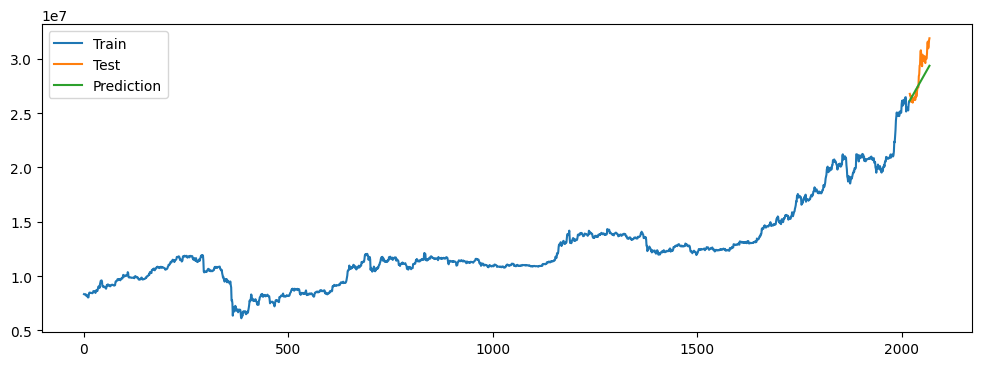

In [418]:
# 테스트 데이터 개수만큼 예측
y_predict = model_fit.forecast(steps=len(test)) 
# y_predict = pd.DataFrame(y_predict,index = test.index,columns=['Prediction'])

# 그래프
fig, axes = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(train['price'], label='Train')        # 훈련 데이터
plt.plot(test['price'], label='Test')          # 테스트 데이터
plt.plot(y_predict, label='Prediction')  # 예측 데이터
plt.legend()
plt.show()